# 8. a)

In [1]:
library(ISLR)

fit <- lm(mpg~horsepower, data = Auto)
summary(fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


In [2]:
predict(fit, data.frame(horsepower=c(98)), interval="prediction")

,fit,lwr,upr
1,24.46708,14.80940,34.12476


# 8. b)

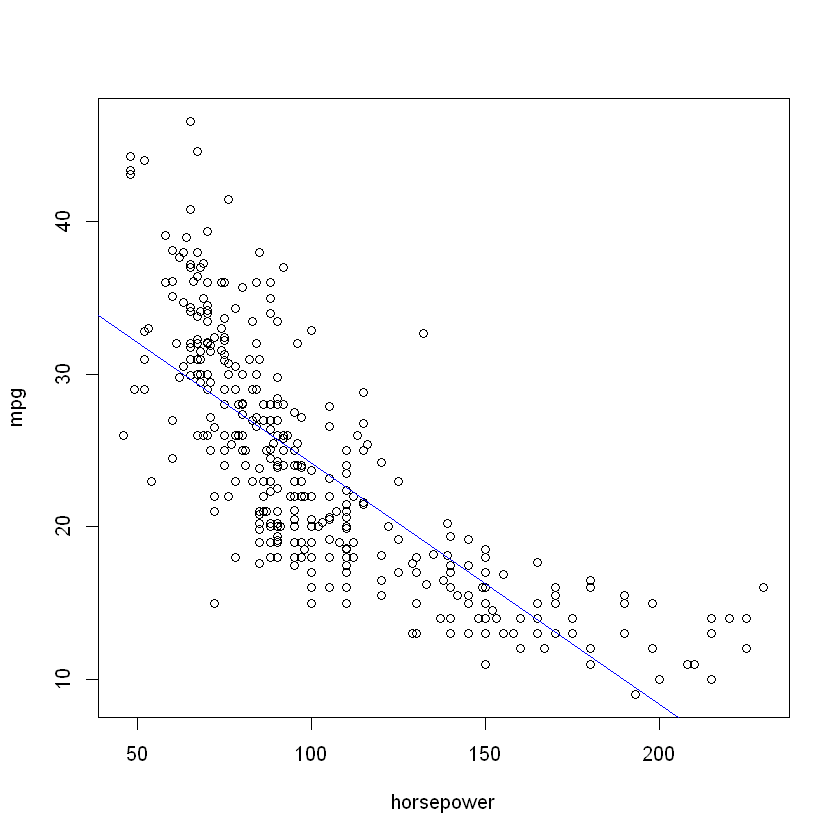

In [3]:
plot(mpg~horsepower, data = Auto)
abline(fit, col = "blue", pch = "20")

# 8. c)

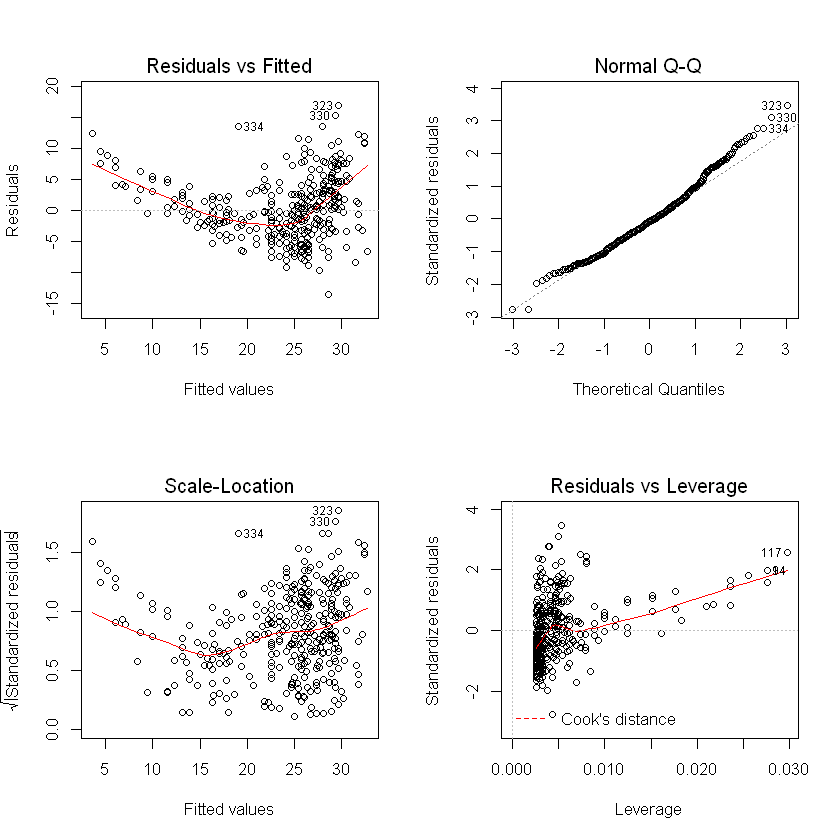

In [4]:
par(mfrow=c(2,2))
plot(fit)

There are signs of nonlinearity in the *Residuals vs Fitted* plot. Notice the U shaped residual plot. The *Scale-Location* plot seems to show that variance is not equal, possibly violating one of the assumptions of this linear model.

Basic Reference: [Understanding Diagnostic Plots for Linear Regression Analysis](http://data.library.virginia.edu/diagnostic-plots/)

# 9. a)

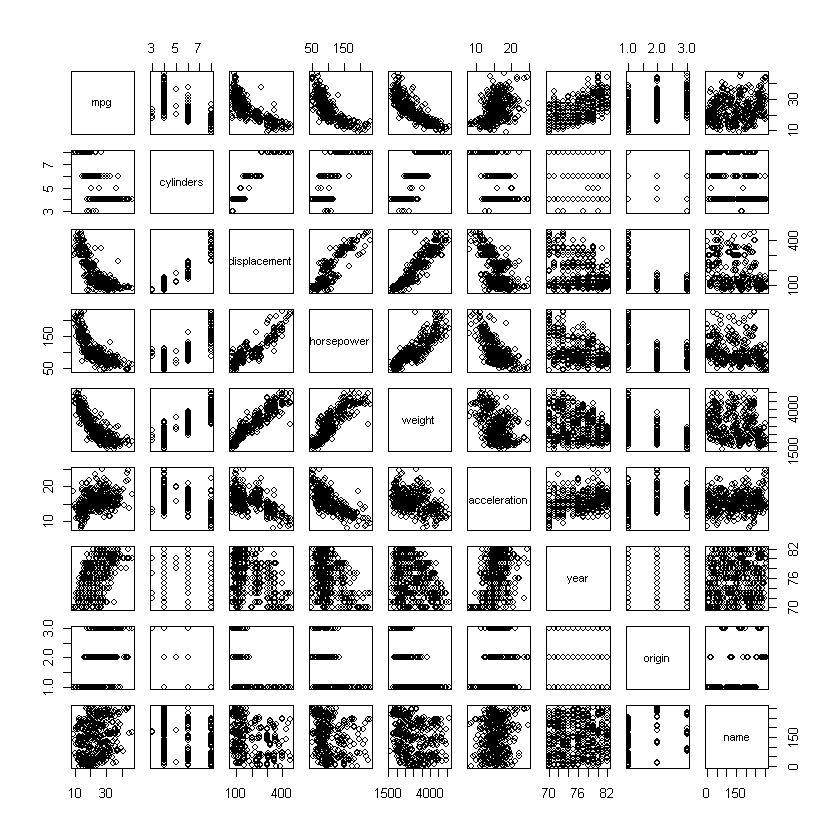

In [5]:
pairs(Auto)

# 9. b)

In [6]:
cor(Auto[!(colnames(Auto) == "name")])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


# 9. c)

In [7]:
fit2 <- lm(mpg~.-name, data = Auto)
summary(fit2)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


i) There are several relationships between the predictors and the responses: weight, origin, and year of the car seem to have the strongest relationships with mpg. The F-statistic is also well above 1, leading us to (probably) reject the null hypothesis.

ii) The variables: displacement, weight, year, and origin appear are statistically significant. The number of cylinders, horsepower, and acceleration do not appear to be significant.

iii) It suggests that cars are becoming more fuel efficient every year. Specifically, the coefficient for year suggests that as the year of the car increases, mpg increases by approximately 0.75.

# 9. d)

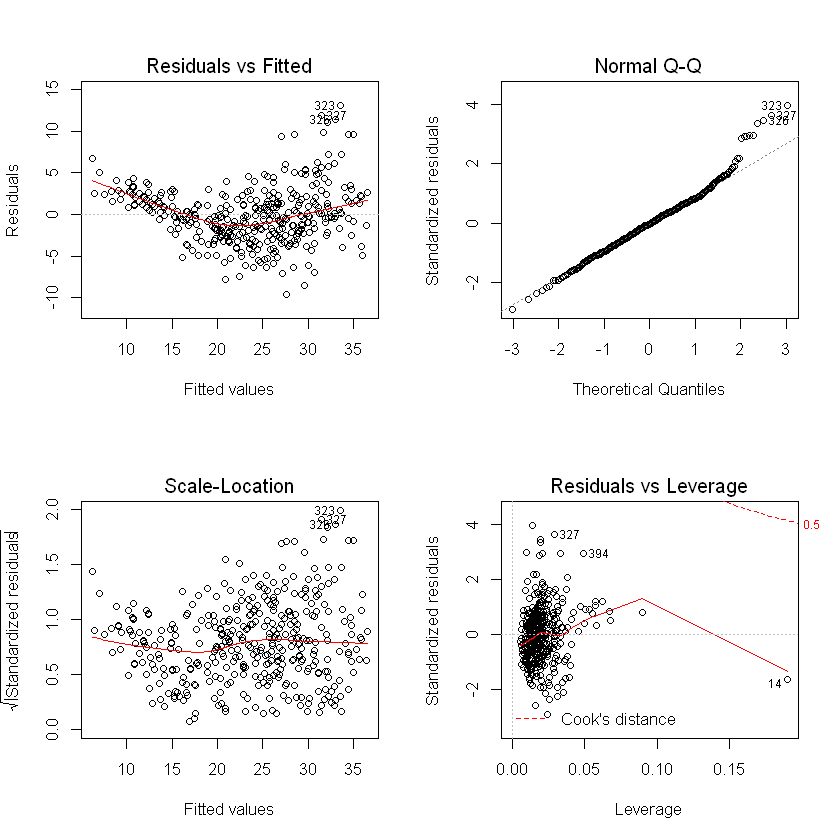

In [8]:
par(mfrow = c(2,2))
plot(fit2)

The *Residuals vs Fitted* plot suggests that there may be a nonlinear relationship in the model. Point 14 also has extremely high leverage compared to all the other points.

# 9. e)

If we refer back to 9. b), we'll notice that there are variables with significant correlation (p<10%) between them. Namely: cylinders and displacement (0.95) and displacement and weight (0.93).

In [9]:
fit3 <- lm(mpg ~ cylinders*displacement + displacement*weight, data = Auto)
summary(fit3)


Call:
lm(formula = mpg ~ cylinders * displacement + displacement * 
    weight, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2934  -2.5184  -0.3476   1.8399  17.7723 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.262e+01  2.237e+00  23.519  < 2e-16 ***
cylinders               7.606e-01  7.669e-01   0.992    0.322    
displacement           -7.351e-02  1.669e-02  -4.403 1.38e-05 ***
weight                 -9.888e-03  1.329e-03  -7.438 6.69e-13 ***
cylinders:displacement -2.986e-03  3.426e-03  -0.872    0.384    
displacement:weight     2.128e-05  5.002e-06   4.254 2.64e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.103 on 386 degrees of freedom
Multiple R-squared:  0.7272,	Adjusted R-squared:  0.7237 
F-statistic: 205.8 on 5 and 386 DF,  p-value: < 2.2e-16


It appears that displacement:horsepower is statistically significant, and cylinders:displacement and displacement:weight being less so.

# 9. f)

# COME BACK TO THIS LATER

# 10. a)

In [10]:
library(ISLR)
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

In [11]:
fit4 <- lm(Sales ~ Price + Urban + US, data=Carseats)
summary(fit4)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


# 10. b)

As the price increases, sales decrease as well. This makes sense because consumers want to save money. This relationship is statistically significant.

*UrbanYes* refers to whether a store is in an urban location or not. While there is a negative coefficient, the p-value is not even close to being significant; thus we can assume there is no statistically significant relationship between sales and whether a store is in an urban area.

*USYes* refers to whether the store is located in the States or not. It appears that being located in the United States improves sales. This relationship is statistically significant.

# 10. c)

$Sales = 13.043 + -0.0544 \times price + 1.2005 \times USYes$, where *USYes* = 1 if true and 0 otherwise.

I have omitted *UrbanYes* because it is not statistically significant.

# 10. d)

We can reject the null hypothesis for two predictors: *Price* and *USYes*.

# 10. e)

This question was asking for a reduced model, with statistically insignificant variables removed - I have already done so for *10. c)*.

# 10. f)

In [12]:
fit5 <- lm(Sales ~ Price + US, data = Carseats)
summary(fit5)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


The models from *10. a)* and *10. e)* do not have much predictive power. They both have an R-squared value of 0.2393, but the second model has a slightly better adjusted R-squared value since it has less variables. Either way, each explains approximately ~23% of the variance within the data.

# 10. g)

In [13]:
confint(fit5, level=0.95)

,2.5 %,97.5 %
(Intercept),11.79032,14.27127
Price,-0.06475984,-0.04419543
USYes,0.6915196,1.7077663


# 10. h)

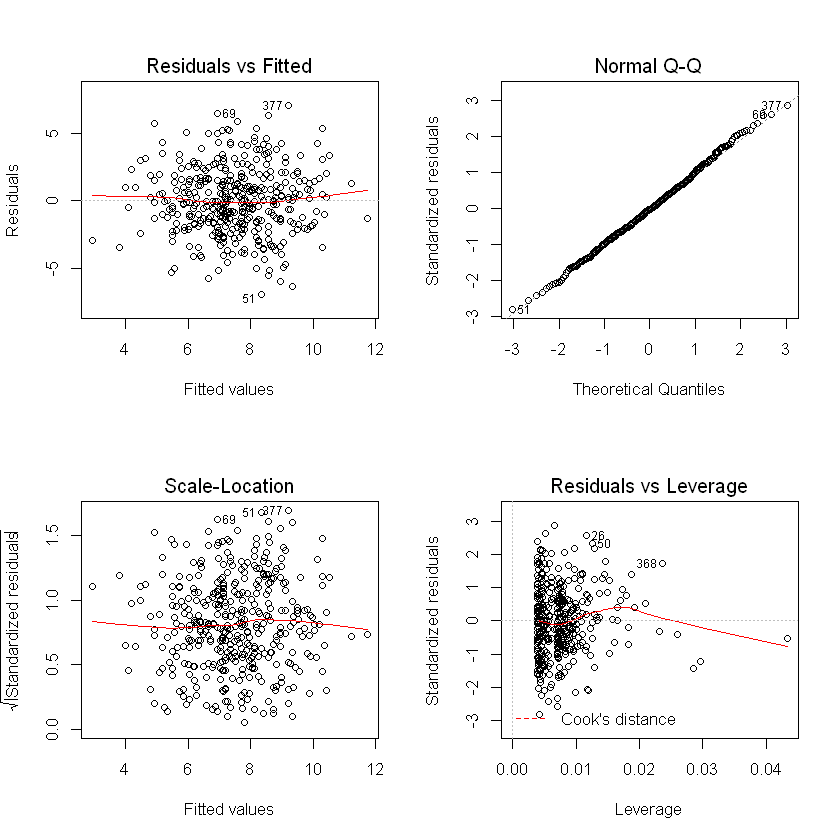

In [14]:
par(mfrow = c(2,2))
plot(fit5)

From the *Residuals vs Leverage* plot, there are clearly a few points with high leverage towards the right side.

# 11. a)

In [15]:
set.seed(1)
x <- rnorm(100)
y <- 2*x*rnorm(100)

In [16]:
fit6 <- lm(y~x+0)
summary(fit6)


Call:
lm(formula = y ~ x + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2550 -0.3983  0.0583  0.8284  3.7841 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)   
x  -0.4508     0.1573  -2.866  0.00508 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.416 on 99 degrees of freedom
Multiple R-squared:  0.07661,	Adjusted R-squared:  0.06728 
F-statistic: 8.213 on 1 and 99 DF,  p-value: 0.00508


Coefficient Estimate of x: -0.4508. Standard Error: 0.1573. T-Statistic: -2.866. P-Value: 0.00508

We can reject the null hypothesis, since the p-value is significant.

# 11. b)

In [17]:
fit7 <- lm(x~y+0)
summary(fit7)


Call:
lm(formula = x ~ y + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9019 -0.4406  0.1230  0.7063  2.7486 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)   
y  -0.1699     0.0593  -2.866  0.00508 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8695 on 99 degrees of freedom
Multiple R-squared:  0.07661,	Adjusted R-squared:  0.06728 
F-statistic: 8.213 on 1 and 99 DF,  p-value: 0.00508


We can reject the null hypothesis, since p < 0.05.

# 11. c)

Both regressions have the same p-value and t-statistic.

Both regressions reflect the same line created in *11. a)*. To see why, consider f(x) = y and f(y) = x. They are two ways of representing the same fundamental relationship. 

# 11. d) - f), 12. a) - c)

To tedious to type out; did by hand.

# 13. a)

In [18]:
set.seed(1)
x <- rnorm(100)

# 13. b)

In [19]:
eps <- rnorm(100, 0, sqrt(0.25))

# 13. c)

In [20]:
y <- -1 + 0.5*x + eps
length(y)

[1] 100

The length of the vector is 100, since x has 100 elements. $B_0$ is -1 and $B_1$ is 0.5.

# 13. d)

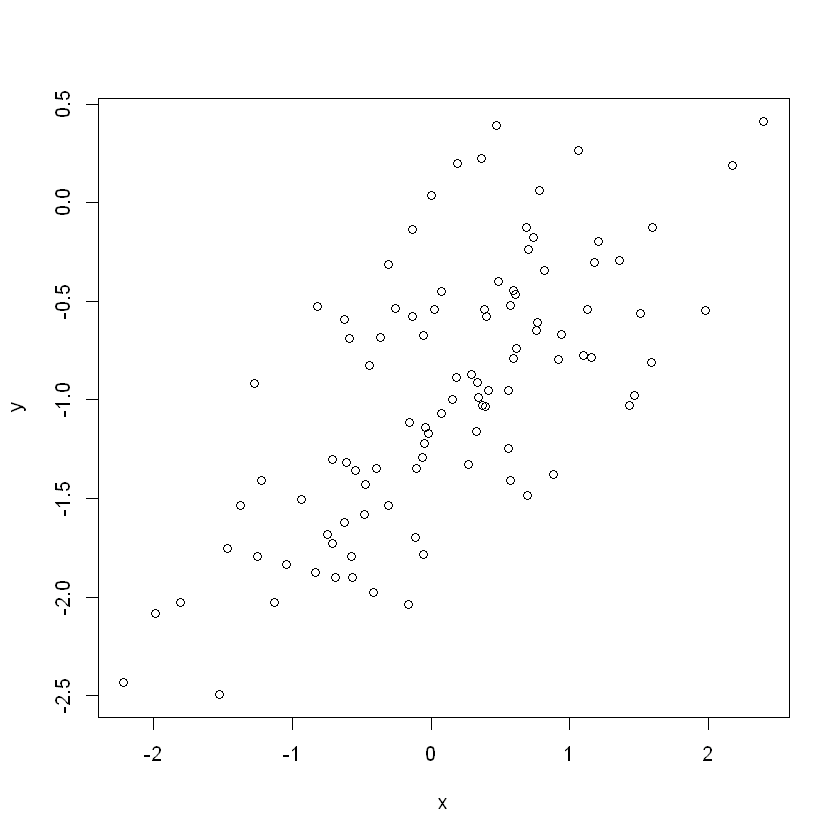

In [21]:
plot(y~x)

The relation between x and y is linear, with noise coming from "eps" and the random nature of x.

Note that $y = B_0 + xB_1 + eps$ is the true relationship.

# 13. e)

In [22]:
fit8 <- lm(y~x)
summary(fit8)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93842 -0.30688 -0.06975  0.26970  1.17309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.01885    0.04849 -21.010  < 2e-16 ***
x            0.49947    0.05386   9.273 4.58e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4814 on 98 degrees of freedom
Multiple R-squared:  0.4674,	Adjusted R-squared:  0.4619 
F-statistic: 85.99 on 1 and 98 DF,  p-value: 4.583e-15


The estimate for the intercept is -1.01885 and the estimate for the coefficient of x is 0.49947. This is almost identical to the actual values of -1 and 0.5. The results are statistically significant so the null hypothesis that $H_0, H_1 = 0$ can be rejected.

# 13. f)

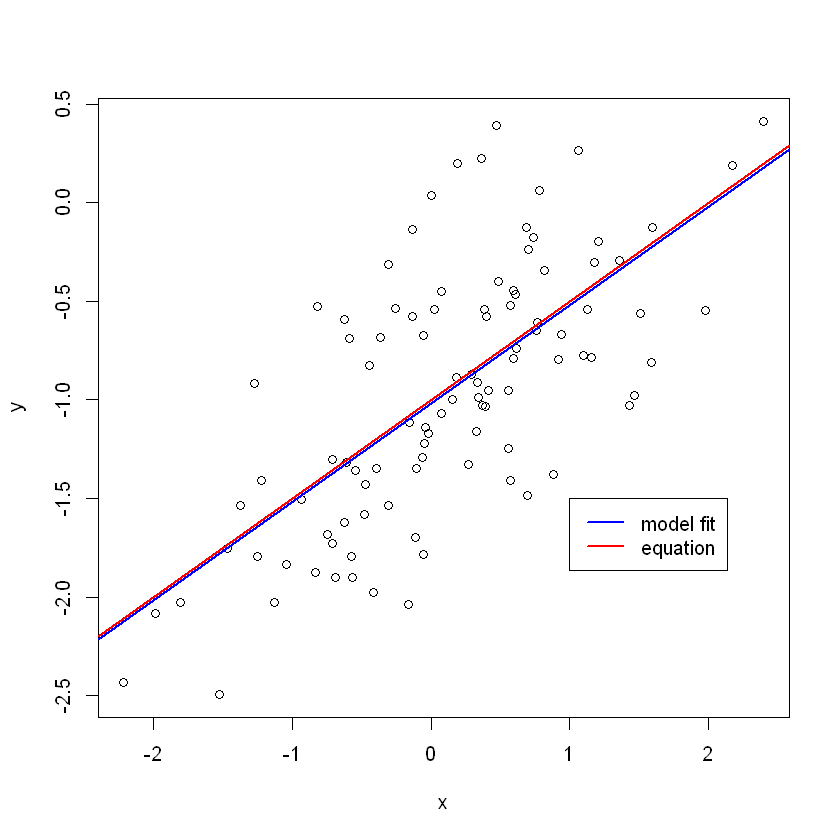

In [23]:
plot(y~x)

#plotting the linear model
abline(fit8, col="blue", lwd = "2")

#plotting the real equation
abline(-1, 0.5, col="red", lwd = "2")

legend(-1.5, legend = c("model fit", "equation"), col = c("blue", "red"), lwd = c("2","2"))

# 13. g)

In [24]:
fit9 <- lm(y~I(x^2)+x)
summary(fit9)


Call:
lm(formula = y ~ I(x^2) + x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98252 -0.31270 -0.06441  0.29014  1.13500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.97164    0.05883 -16.517  < 2e-16 ***
I(x^2)      -0.05946    0.04238  -1.403    0.164    
x            0.50858    0.05399   9.420  2.4e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.479 on 97 degrees of freedom
Multiple R-squared:  0.4779,	Adjusted R-squared:  0.4672 
F-statistic:  44.4 on 2 and 97 DF,  p-value: 2.038e-14


Surprisingly, the fit is "better", in the sense that the R-squared and adjusted R-squared values are higher than they previously were, and RSE is lower than previusly. However, I(x^2) does not appear to be statistically significant, so this suggests that there isn't really a relationship between y and x^2 (of which there isn't).

Recall that R-squared and variance is monotonically increasing; adding variables will never decrease R-squared (although it might decrease adjusted R-squared), since it just gives the fitting procedure more opportunities to mistake signal for noise.

# 13. h)

In [25]:
eps2 <- rnorm(100, 0, sqrt(0.1))
y2 <- -1 + 0.5*x + eps2
fit10 <- lm(y2~x)
summary(fit10)


Call:
lm(formula = y2 ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92152 -0.15252 -0.01433  0.20531  0.83534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.99135    0.03311  -29.94   <2e-16 ***
x            0.50669    0.03678   13.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3287 on 98 degrees of freedom
Multiple R-squared:  0.6595,	Adjusted R-squared:  0.656 
F-statistic: 189.8 on 1 and 98 DF,  p-value: < 2.2e-16


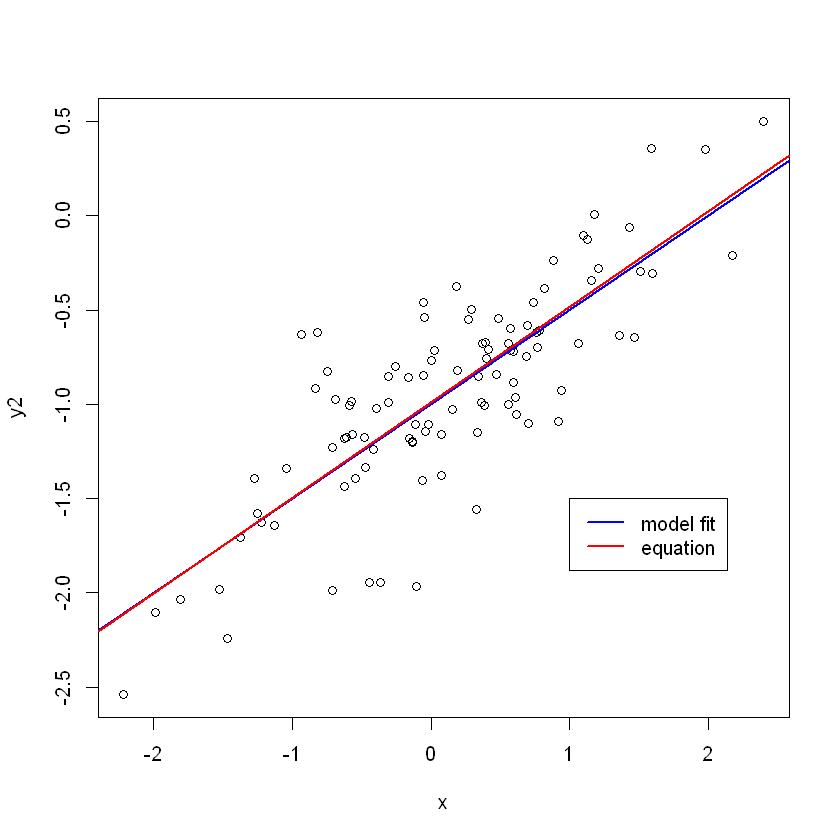

In [26]:
plot(y2~x)
abline(-1, 0.5, col = "blue", lwd="2")
abline(fit10, col="red", lwd="2")
legend(-1.5, legend = c("model fit", "equation"), col = c("blue", "red"), lwd = c("2","2"))

The fit has increased significantly. This is to be expected, since decreasing noise makes it easier to approximate the real relationship (which is linear) with the linear model.

# 13. i)

In [27]:
eps3 <- rnorm(100, 0, 0.5)
y3 <- -1 + 0.5*x + eps3
fit11 <- lm(y3~x)
summary(fit11)


Call:
lm(formula = y3 ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25813 -0.27262 -0.01888  0.33644  0.93944 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.97117    0.05014 -19.369  < 2e-16 ***
x            0.47216    0.05569   8.478  2.4e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4977 on 98 degrees of freedom
Multiple R-squared:  0.4231,	Adjusted R-squared:  0.4172 
F-statistic: 71.87 on 1 and 98 DF,  p-value: 2.4e-13


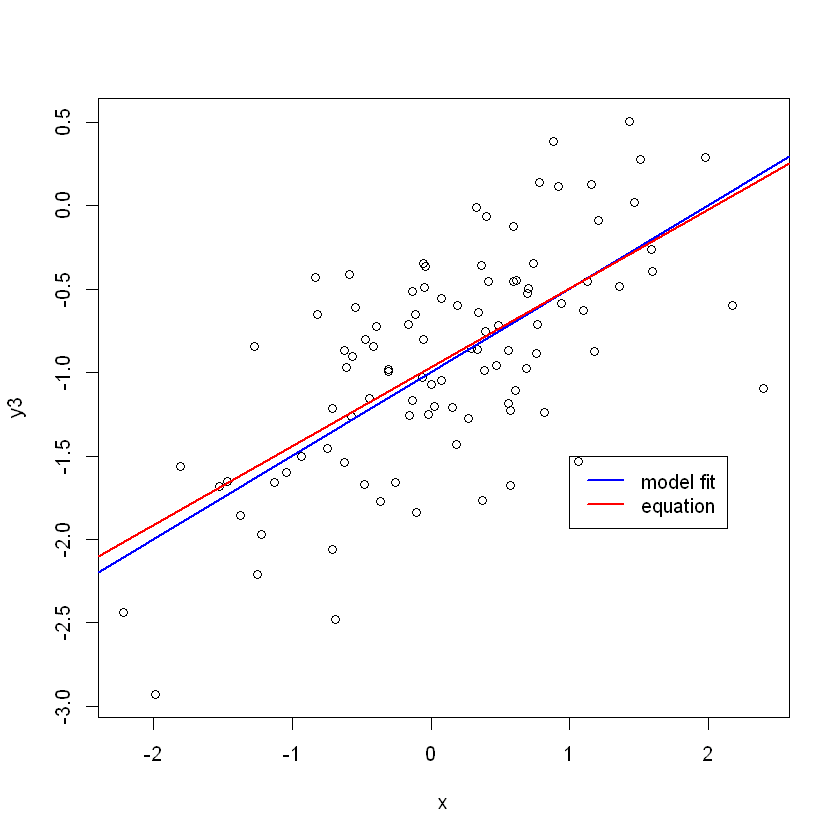

In [28]:
plot(y3~x)
abline(-1, 0.5, col = "blue", lwd="2")
abline(fit11, col="red", lwd="2")
legend(-1.5, legend = c("model fit", "equation"), col = c("blue", "red"), lwd = c("2","2"))

As expected, the fit has worsened. The R-squared value has decreased (which means the model now explains less of the variance), and RSE has increased. This is a natural consequence of increasing the noise within the data, and is to be expected.

In [29]:
confint(fit8, level=0.95)

,2.5 %,97.5 %
(Intercept),-1.1150804,-0.9226122
x,0.3925794,0.6063602


In [30]:
confint(fit10, level=0.95)

,2.5 %,97.5 %
(Intercept),-1.0570515,-0.9256389
x,0.4337114,0.5796757


In [31]:
confint(fit11, level=0.95)

,2.5 %,97.5 %
(Intercept),-1.0706700,-0.8716647
x,0.3616360,0.5826779


As the data gets messier, the confidence intervals increase as well. This is because with noiser data, the linear model will naturally account for less of the variance, and thus loses predictive power.

# 14. a)

In [32]:
set.seed(1)
x1 <- runif(100)
x2 <- 0.5*x1 + rnorm(100)/10
y <- 2 + 2*x1 + 0.3*x2 + rnorm(100)

The model can be represented by: $Y = 2 + 2X_1 + 0.3X_2 + \epsilon$.

The coefficients are: $B_0 = 2, B_1 = 2, B_2 = 0.3$.

In [33]:
cor(x1,x2)

[1] 0.8351212

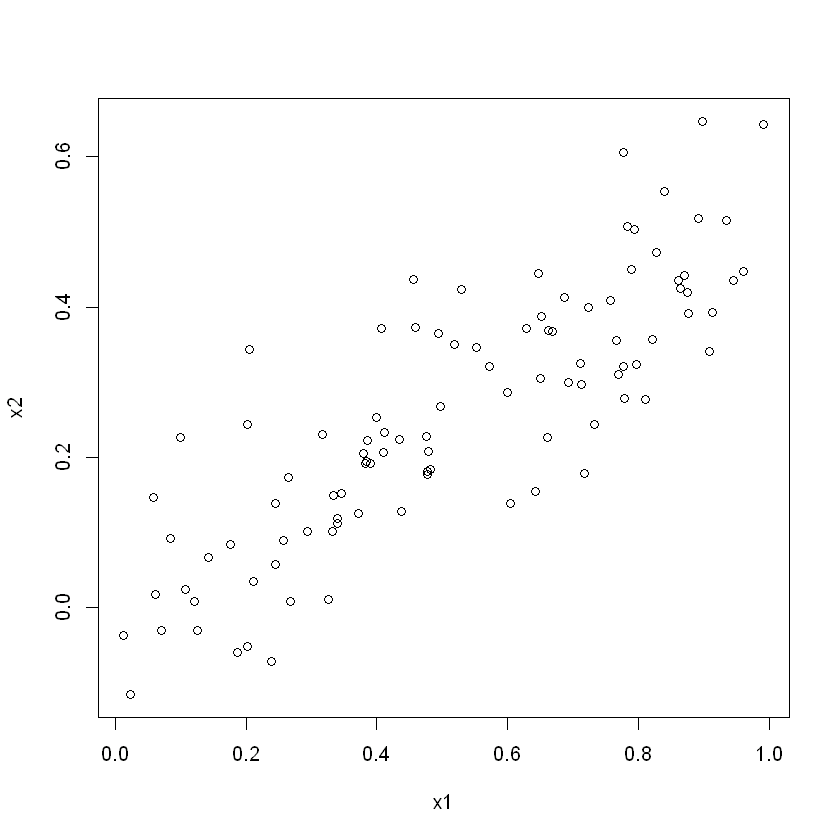

In [34]:
plot(x2~x1)

From "eyeballing" the plot, one can immediately tell they are correlated.

# 14. c)

In [35]:
fit12 <- lm(y ~ x1+x2)
summary(fit12)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


$B_0 = 2.1304, B_1 = 1.4396, B_2 = 1.0097$. The intercept is very close, but the other coefficients are pretty far off. X1 just barely meets the threshold of significance (at the 5% level), and the p-value of X2 suggests that there is no relation between y and X2 at all. We can reject the null hypothesis for the intercept and X1, but not X2.

# 14. d)

In [36]:
fit13 <- lm(y ~ x1)
summary(fit13)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


All coefficients appear to be statistically significant, and much closer to their true values of 2. We can reject the null hypothesis for $\beta_1=0$.

# 14. e)

In [37]:
fit14 <- lm(y ~ x2)
summary(fit14)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


All coefficients appear to be statistically significant. We can reject the null hypothesis for $\beta_1=0$.

# 14. f)

The results do not contradict each other, although they may be a bit confusing at first.

This is because the predictors X1 and X2 are highly correlated; indeed, $x_2 = 0.5 \times x_1 + eps$. When there is collinearity between predictors, it is difficult o determine how each predictor independently affects the response. Indeed, one of the assumptions behind linear modelling is that of little or no collinearity - it can still produce good results, but the real relationship will become muddled. In (c), we may fail to reject the null hypothesis for $\beta_2 = 0$.

However, when we isolate for either X1 or X2, it is immediately obvious that they are both strongly correlated with y. This is because collinearity is no longer an issue, and both regressions show that there is a clear relationship between both X1 -> y, and X2 -> y, which reflects the true relationship.

In [38]:
x1 <- c(x1, 0.1)
x2 <- c(x2, 0.8)
y <- c(y, 6)

fit15 <- lm(y ~ x1 + x2)
summary(fit15)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06


In [39]:
fit16 <- lm(y ~x1)
summary(fit16)


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05


In [40]:
fit17 <- lm(y~x2)
summary(fit17)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06


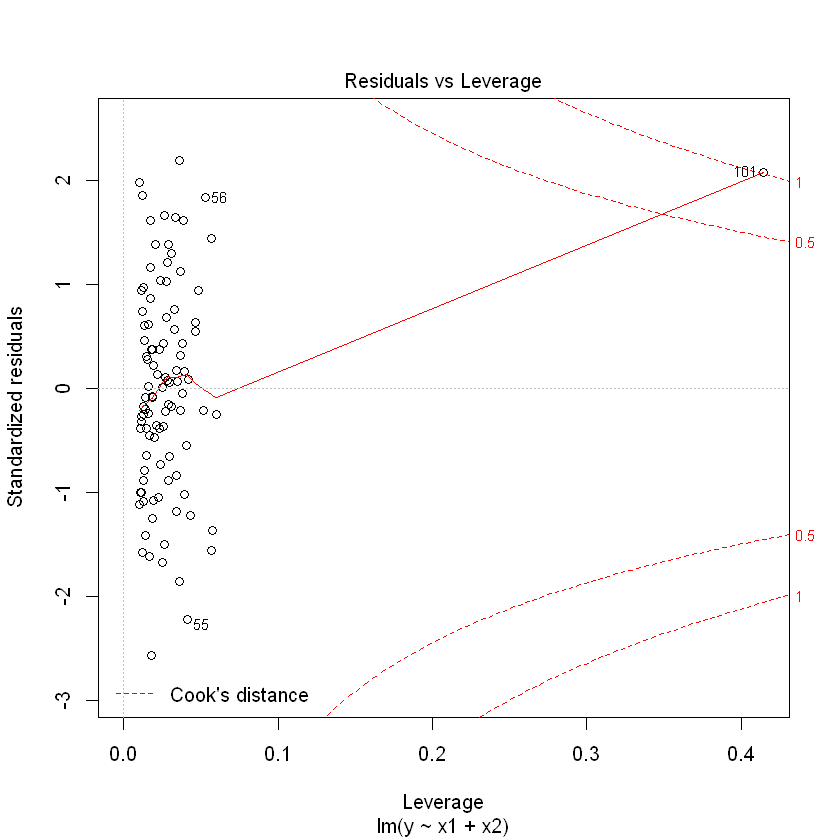

In [41]:
#par(mfrow=c(2,2))
plot(fit15, which = 5)

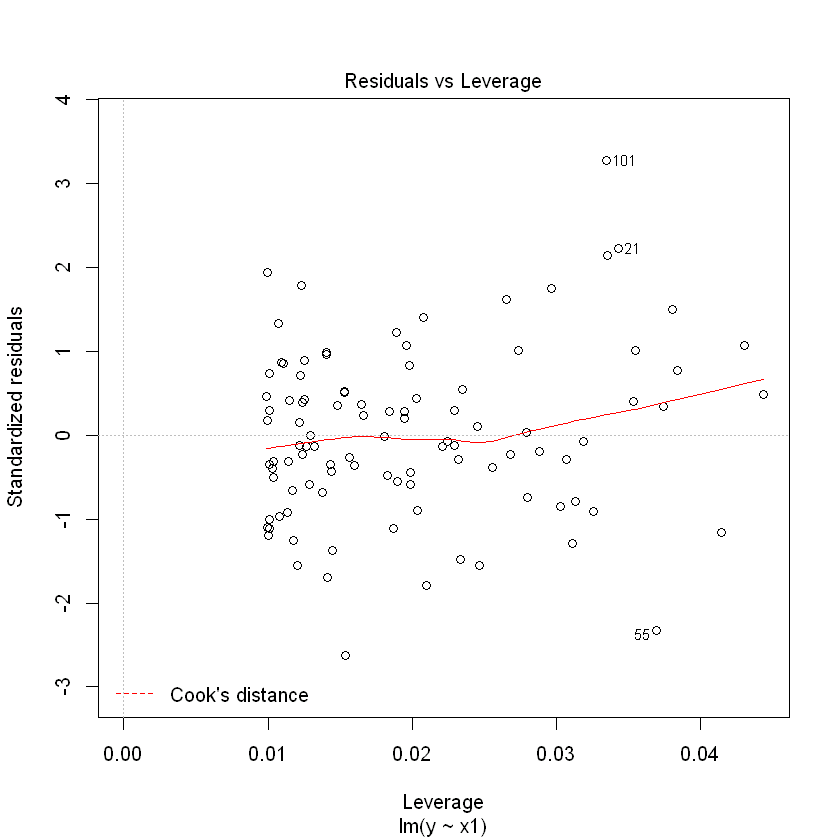

In [42]:
plot(fit16, which = 5)

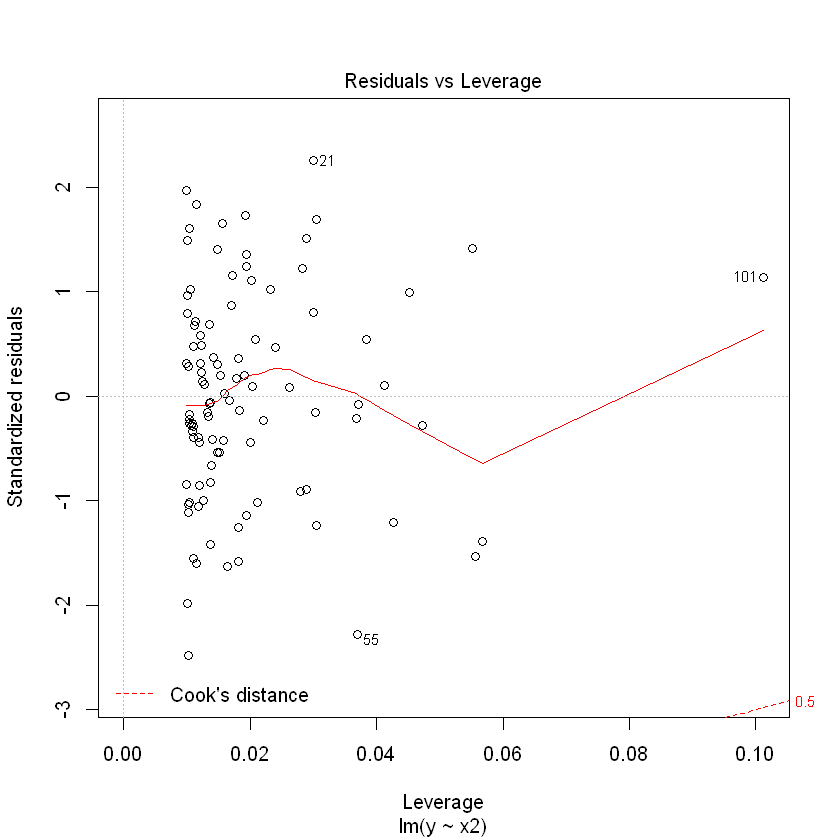

In [43]:
plot(fit17, which = 5)

# 15. a)

In [44]:
library(MASS)
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [45]:
fit.zn <- lm(crim~zn, data=Boston)
summary(fit.zn)


Call:
lm(formula = crim ~ zn, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.429 -4.222 -2.620  1.250 84.523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.45369    0.41722  10.675  < 2e-16 ***
zn          -0.07393    0.01609  -4.594 5.51e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.435 on 504 degrees of freedom
Multiple R-squared:  0.04019,	Adjusted R-squared:  0.03828 
F-statistic:  21.1 on 1 and 504 DF,  p-value: 5.506e-06


In [46]:
fit.indus <- lm(crim~indus, data=Boston)
summary(fit.indus)


Call:
lm(formula = crim ~ indus, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.972  -2.698  -0.736   0.712  81.813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.06374    0.66723  -3.093  0.00209 ** 
indus        0.50978    0.05102   9.991  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.866 on 504 degrees of freedom
Multiple R-squared:  0.1653,	Adjusted R-squared:  0.1637 
F-statistic: 99.82 on 1 and 504 DF,  p-value: < 2.2e-16


In [47]:
fit.chas <- lm(crim~chas, data=Boston)
summary(fit.chas)


Call:
lm(formula = crim ~ chas, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-3.738 -3.661 -3.435  0.018 85.232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7444     0.3961   9.453   <2e-16 ***
chas         -1.8928     1.5061  -1.257    0.209    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.597 on 504 degrees of freedom
Multiple R-squared:  0.003124,	Adjusted R-squared:  0.001146 
F-statistic: 1.579 on 1 and 504 DF,  p-value: 0.2094


In [48]:
fit.nox <- lm(crim~nox, data=Boston)
summary(fit.nox)


Call:
lm(formula = crim ~ nox, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.371  -2.738  -0.974   0.559  81.728 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -13.720      1.699  -8.073 5.08e-15 ***
nox           31.249      2.999  10.419  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.81 on 504 degrees of freedom
Multiple R-squared:  0.1772,	Adjusted R-squared:  0.1756 
F-statistic: 108.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [49]:
fit.rm <- lm(crim~rm, data=Boston)
summary(fit.rm)


Call:
lm(formula = crim ~ rm, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.604 -3.952 -2.654  0.989 87.197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.482      3.365   6.088 2.27e-09 ***
rm            -2.684      0.532  -5.045 6.35e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.401 on 504 degrees of freedom
Multiple R-squared:  0.04807,	Adjusted R-squared:  0.04618 
F-statistic: 25.45 on 1 and 504 DF,  p-value: 6.347e-07


In [50]:
fit.age <- lm(crim~age, data=Boston)
summary(fit.age)


Call:
lm(formula = crim ~ age, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.789 -4.257 -1.230  1.527 82.849 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.77791    0.94398  -4.002 7.22e-05 ***
age          0.10779    0.01274   8.463 2.85e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.057 on 504 degrees of freedom
Multiple R-squared:  0.1244,	Adjusted R-squared:  0.1227 
F-statistic: 71.62 on 1 and 504 DF,  p-value: 2.855e-16


In [51]:
fit.dis <- lm(crim~dis, data=Boston)
summary(fit.dis)


Call:
lm(formula = crim ~ dis, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.708 -4.134 -1.527  1.516 81.674 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.4993     0.7304  13.006   <2e-16 ***
dis          -1.5509     0.1683  -9.213   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.965 on 504 degrees of freedom
Multiple R-squared:  0.1441,	Adjusted R-squared:  0.1425 
F-statistic: 84.89 on 1 and 504 DF,  p-value: < 2.2e-16


In [52]:
fit.rad <- lm(crim~rad, data=Boston)
summary(fit.rad)


Call:
lm(formula = crim ~ rad, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.164  -1.381  -0.141   0.660  76.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.28716    0.44348  -5.157 3.61e-07 ***
rad          0.61791    0.03433  17.998  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.718 on 504 degrees of freedom
Multiple R-squared:  0.3913,	Adjusted R-squared:   0.39 
F-statistic: 323.9 on 1 and 504 DF,  p-value: < 2.2e-16


In [53]:
fit.tax <- lm(crim~tax, data=Boston)
summary(fit.tax)


Call:
lm(formula = crim ~ tax, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.513  -2.738  -0.194   1.065  77.696 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.528369   0.815809  -10.45   <2e-16 ***
tax          0.029742   0.001847   16.10   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.997 on 504 degrees of freedom
Multiple R-squared:  0.3396,	Adjusted R-squared:  0.3383 
F-statistic: 259.2 on 1 and 504 DF,  p-value: < 2.2e-16


In [54]:
fit.ptratio <- lm(crim~ptratio, data=Boston)
summary(fit.ptratio)


Call:
lm(formula = crim ~ ptratio, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-7.654 -3.985 -1.912  1.825 83.353 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.6469     3.1473  -5.607 3.40e-08 ***
ptratio       1.1520     0.1694   6.801 2.94e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.24 on 504 degrees of freedom
Multiple R-squared:  0.08407,	Adjusted R-squared:  0.08225 
F-statistic: 46.26 on 1 and 504 DF,  p-value: 2.943e-11


In [55]:
fit.black <- lm(crim~black, data=Boston)
summary(fit.black)


Call:
lm(formula = crim ~ black, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.756  -2.299  -2.095  -1.296  86.822 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.553529   1.425903  11.609   <2e-16 ***
black       -0.036280   0.003873  -9.367   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.946 on 504 degrees of freedom
Multiple R-squared:  0.1483,	Adjusted R-squared:  0.1466 
F-statistic: 87.74 on 1 and 504 DF,  p-value: < 2.2e-16


In [56]:
fit.lstat <- lm(crim~lstat, data=Boston)
summary(fit.lstat)


Call:
lm(formula = crim ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.925  -2.822  -0.664   1.079  82.862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.33054    0.69376  -4.801 2.09e-06 ***
lstat        0.54880    0.04776  11.491  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.664 on 504 degrees of freedom
Multiple R-squared:  0.2076,	Adjusted R-squared:  0.206 
F-statistic:   132 on 1 and 504 DF,  p-value: < 2.2e-16


In [57]:
fit.medv <- lm(crim~medv, data=Boston)
summary(fit.medv)


Call:
lm(formula = crim ~ medv, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.071 -4.022 -2.343  1.298 80.957 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.79654    0.93419   12.63   <2e-16 ***
medv        -0.36316    0.03839   -9.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.934 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


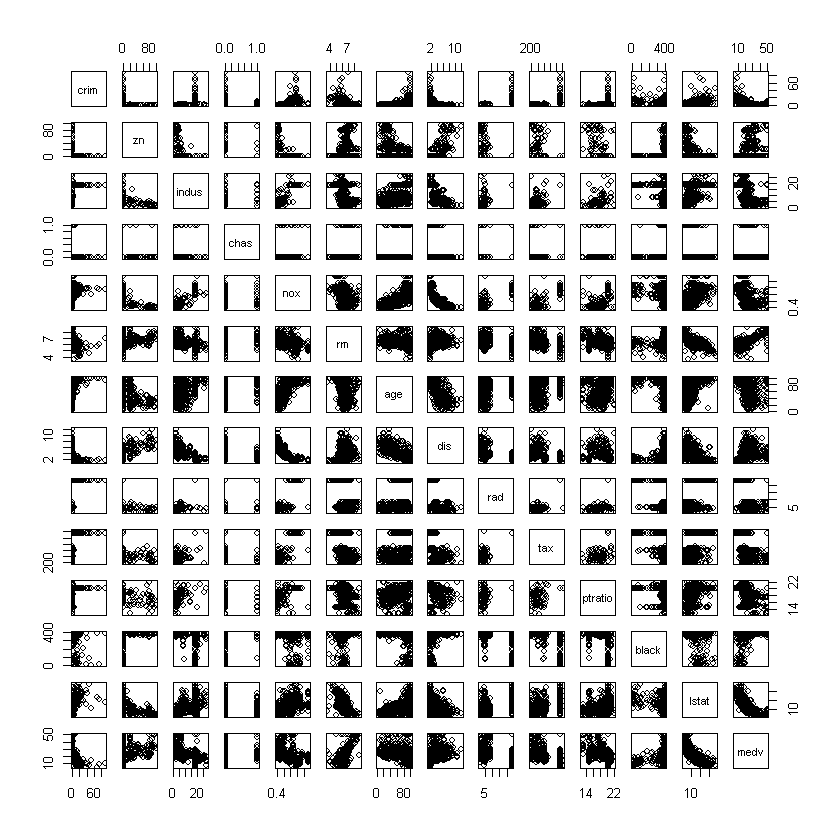

In [58]:
pairs(Boston)

There appears to be a statistically significant relationship between crime and every single other variable in the dataset except for chas (whether or not the housing values are along the Charles river).

Admittedly, not every single one of them has much explanatory power, with r-squared values all falling below 0.4, and closer to 0.1 in most cases.

# 15. b)

In [59]:
fit.all <- lm(crim~., data=Boston)
summary(fit.all)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '***' 0.0

Suppose we use the standard 5% significance threshold. Then we can reject the null hypothesis for the following: zn, indus, dis, rad, and medv.

It appears that many of the variables that appeared significant before are no longer significant. This could be due to several reasons. Perhaps many of these variables are correlated with *each other*. In that case, it's difficult to distinguish the collinearity for what it is, and the signal gets lost in the noise.

# 15. c)

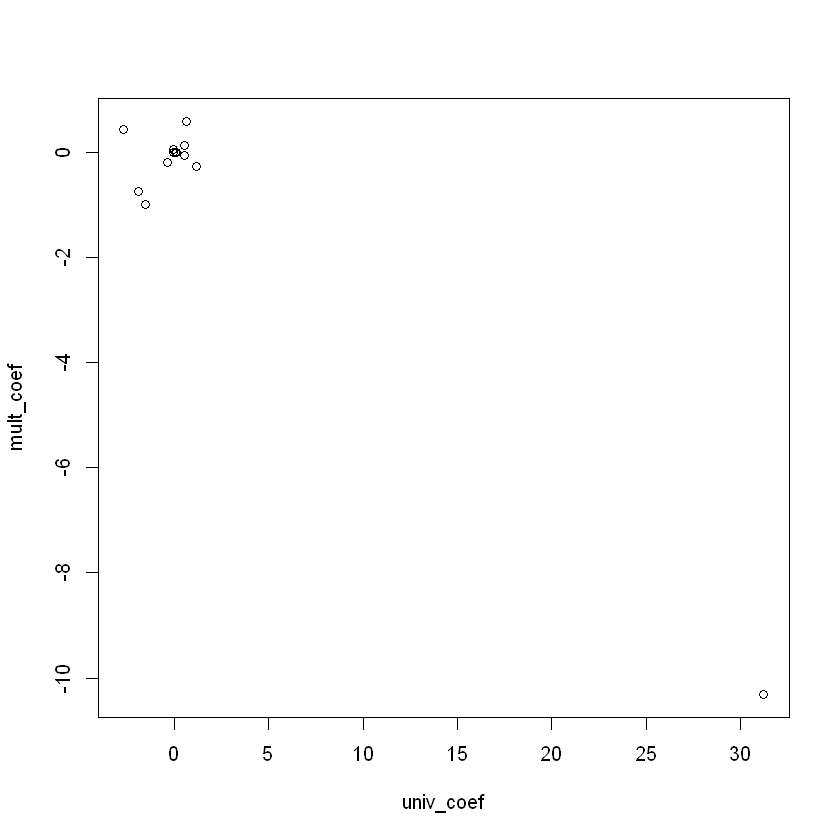

In [60]:
univ_coef <- c(coef(fit.zn)[2],
              coef(fit.indus)[2],
              coef(fit.chas)[2],
              coef(fit.nox)[2],
              coef(fit.rm)[2],
              coef(fit.age)[2],
              coef(fit.dis)[2],
              coef(fit.rad)[2],
              coef(fit.tax)[2],
              coef(fit.ptratio)[2],
              coef(fit.black)[2],
              coef(fit.lstat)[2],
              coef(fit.medv)[2])

mult_coef <- coef(fit.all)[2:14]

plot(univ_coef, mult_coef)

# 15. d)

In [61]:
fit2.zn <- lm(crim~poly(zn,3), data=Boston)
summary(fit2.zn)


Call:
lm(formula = crim ~ poly(zn, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.821 -4.614 -1.294  0.473 84.130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.6135     0.3722   9.709  < 2e-16 ***
poly(zn, 3)1 -38.7498     8.3722  -4.628  4.7e-06 ***
poly(zn, 3)2  23.9398     8.3722   2.859  0.00442 ** 
poly(zn, 3)3 -10.0719     8.3722  -1.203  0.22954    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.372 on 502 degrees of freedom
Multiple R-squared:  0.05824,	Adjusted R-squared:  0.05261 
F-statistic: 10.35 on 3 and 502 DF,  p-value: 1.281e-06


In [62]:
fit2.indus <- lm(crim~poly(indus,3), data=Boston)
summary(fit2.indus)


Call:
lm(formula = crim ~ poly(indus, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-8.278 -2.514  0.054  0.764 79.713 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.614      0.330  10.950  < 2e-16 ***
poly(indus, 3)1   78.591      7.423  10.587  < 2e-16 ***
poly(indus, 3)2  -24.395      7.423  -3.286  0.00109 ** 
poly(indus, 3)3  -54.130      7.423  -7.292  1.2e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.423 on 502 degrees of freedom
Multiple R-squared:  0.2597,	Adjusted R-squared:  0.2552 
F-statistic: 58.69 on 3 and 502 DF,  p-value: < 2.2e-16


In [64]:
fit2.nox <- lm(crim~poly(nox,3), data=Boston)
summary(fit2.nox)


Call:
lm(formula = crim ~ poly(nox, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.110 -2.068 -0.255  0.739 78.302 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3216  11.237  < 2e-16 ***
poly(nox, 3)1  81.3720     7.2336  11.249  < 2e-16 ***
poly(nox, 3)2 -28.8286     7.2336  -3.985 7.74e-05 ***
poly(nox, 3)3 -60.3619     7.2336  -8.345 6.96e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.234 on 502 degrees of freedom
Multiple R-squared:  0.297,	Adjusted R-squared:  0.2928 
F-statistic: 70.69 on 3 and 502 DF,  p-value: < 2.2e-16


In [65]:
fit2.rm <- lm(crim~poly(rm,3), data=Boston)
summary(fit2.rm)


Call:
lm(formula = crim ~ poly(rm, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.485  -3.468  -2.221  -0.015  87.219 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.6135     0.3703   9.758  < 2e-16 ***
poly(rm, 3)1 -42.3794     8.3297  -5.088 5.13e-07 ***
poly(rm, 3)2  26.5768     8.3297   3.191  0.00151 ** 
poly(rm, 3)3  -5.5103     8.3297  -0.662  0.50858    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.33 on 502 degrees of freedom
Multiple R-squared:  0.06779,	Adjusted R-squared:  0.06222 
F-statistic: 12.17 on 3 and 502 DF,  p-value: 1.067e-07


In [66]:
fit2.age <- lm(crim~poly(age,3), data=Boston)
summary(fit2.age)


Call:
lm(formula = crim ~ poly(age, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.762 -2.673 -0.516  0.019 82.842 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3485  10.368  < 2e-16 ***
poly(age, 3)1  68.1820     7.8397   8.697  < 2e-16 ***
poly(age, 3)2  37.4845     7.8397   4.781 2.29e-06 ***
poly(age, 3)3  21.3532     7.8397   2.724  0.00668 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.84 on 502 degrees of freedom
Multiple R-squared:  0.1742,	Adjusted R-squared:  0.1693 
F-statistic: 35.31 on 3 and 502 DF,  p-value: < 2.2e-16


In [67]:
fit2.dis <- lm(crim~poly(dis,3), data=Boston)
summary(fit2.dis)


Call:
lm(formula = crim ~ poly(dis, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.757  -2.588   0.031   1.267  76.378 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3259  11.087  < 2e-16 ***
poly(dis, 3)1 -73.3886     7.3315 -10.010  < 2e-16 ***
poly(dis, 3)2  56.3730     7.3315   7.689 7.87e-14 ***
poly(dis, 3)3 -42.6219     7.3315  -5.814 1.09e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.331 on 502 degrees of freedom
Multiple R-squared:  0.2778,	Adjusted R-squared:  0.2735 
F-statistic: 64.37 on 3 and 502 DF,  p-value: < 2.2e-16


In [68]:
fit2.rad <- lm(crim~poly(rad,3), data=Boston)
summary(fit2.rad)


Call:
lm(formula = crim ~ poly(rad, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.381  -0.412  -0.269   0.179  76.217 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.2971  12.164  < 2e-16 ***
poly(rad, 3)1 120.9074     6.6824  18.093  < 2e-16 ***
poly(rad, 3)2  17.4923     6.6824   2.618  0.00912 ** 
poly(rad, 3)3   4.6985     6.6824   0.703  0.48231    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.682 on 502 degrees of freedom
Multiple R-squared:    0.4,	Adjusted R-squared:  0.3965 
F-statistic: 111.6 on 3 and 502 DF,  p-value: < 2.2e-16


In [69]:
fit2.tax <- lm(crim~poly(tax,3), data=Boston)
summary(fit2.tax)


Call:
lm(formula = crim ~ poly(tax, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.273  -1.389   0.046   0.536  76.950 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3047  11.860  < 2e-16 ***
poly(tax, 3)1 112.6458     6.8537  16.436  < 2e-16 ***
poly(tax, 3)2  32.0873     6.8537   4.682 3.67e-06 ***
poly(tax, 3)3  -7.9968     6.8537  -1.167    0.244    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.854 on 502 degrees of freedom
Multiple R-squared:  0.3689,	Adjusted R-squared:  0.3651 
F-statistic:  97.8 on 3 and 502 DF,  p-value: < 2.2e-16


In [70]:
fit2.ptratio <- lm(crim~poly(ptratio,3), data=Boston)
summary(fit2.ptratio)


Call:
lm(formula = crim ~ poly(ptratio, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.833 -4.146 -1.655  1.408 82.697 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.614      0.361  10.008  < 2e-16 ***
poly(ptratio, 3)1   56.045      8.122   6.901 1.57e-11 ***
poly(ptratio, 3)2   24.775      8.122   3.050  0.00241 ** 
poly(ptratio, 3)3  -22.280      8.122  -2.743  0.00630 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.122 on 502 degrees of freedom
Multiple R-squared:  0.1138,	Adjusted R-squared:  0.1085 
F-statistic: 21.48 on 3 and 502 DF,  p-value: 4.171e-13


In [71]:
fit2.black <- lm(crim~poly(black,3), data=Boston)
summary(fit2.black)


Call:
lm(formula = crim ~ poly(black, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.096  -2.343  -2.128  -1.439  86.790 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.6135     0.3536  10.218   <2e-16 ***
poly(black, 3)1 -74.4312     7.9546  -9.357   <2e-16 ***
poly(black, 3)2   5.9264     7.9546   0.745    0.457    
poly(black, 3)3  -4.8346     7.9546  -0.608    0.544    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.955 on 502 degrees of freedom
Multiple R-squared:  0.1498,	Adjusted R-squared:  0.1448 
F-statistic: 29.49 on 3 and 502 DF,  p-value: < 2.2e-16


In [72]:
fit2.lstat <- lm(crim~poly(lstat,3), data=Boston)
summary(fit2.lstat)


Call:
lm(formula = crim ~ poly(lstat, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.234  -2.151  -0.486   0.066  83.353 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.6135     0.3392  10.654   <2e-16 ***
poly(lstat, 3)1  88.0697     7.6294  11.543   <2e-16 ***
poly(lstat, 3)2  15.8882     7.6294   2.082   0.0378 *  
poly(lstat, 3)3 -11.5740     7.6294  -1.517   0.1299    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.629 on 502 degrees of freedom
Multiple R-squared:  0.2179,	Adjusted R-squared:  0.2133 
F-statistic: 46.63 on 3 and 502 DF,  p-value: < 2.2e-16


In [73]:
fit2.medv <- lm(crim~poly(medv,3), data=Boston)
summary(fit2.medv)


Call:
lm(formula = crim ~ poly(medv, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.427  -1.976  -0.437   0.439  73.655 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.614      0.292  12.374  < 2e-16 ***
poly(medv, 3)1  -75.058      6.569 -11.426  < 2e-16 ***
poly(medv, 3)2   88.086      6.569  13.409  < 2e-16 ***
poly(medv, 3)3  -48.033      6.569  -7.312 1.05e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.569 on 502 degrees of freedom
Multiple R-squared:  0.4202,	Adjusted R-squared:  0.4167 
F-statistic: 121.3 on 3 and 502 DF,  p-value: < 2.2e-16


There appears to be a statistically significant non-linear relationship of some sort for every single predictor except for chas, which being a dummy binary variable obviously cannot exhibit a nonlinear relationship.